## Project Description: Next Word Prediction Using LSTM
#### Project Overview:

This project aims to develop a deep learning model for predicting the next word in a given sequence of words. The model is built using Long Short-Term Memory (GRU) networks, which are well-suited for sequence prediction tasks. The project includes the following steps:

1- Data Collection: We use the text of Shakespeare's "Hamlet" as our dataset. This rich, complex text provides a good challenge for our model.

2- Data Preprocessing: The text data is tokenized, converted into sequences, and padded to ensure uniform input lengths. The sequences are then split into training and testing sets.

3- Model Building: An GRU model is constructed with an embedding layer, two GRU layers, and a dense output layer with a softmax activation function to predict the probability of the next word and a dropout layer.

4- Model Training: The model is trained using the prepared sequences, with early stopping implemented to prevent overfitting. Early stopping monitors the validation loss and stops training when the loss stops improving.

5- Model Evaluation: The model is evaluated using a set of example sentences to test its ability to predict the next word accurately.

6- Deployment: A Streamlit web application is developed to allow users to input a sequence of words and get the predicted next word in real-time.

In [1]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Set the new directory path
new_directory = '/content/drive/My Drive/Machine Learning/RNN'

# Change the current working directory
os.chdir(new_directory)

# Verify the change
print(f"Current directory is: {os.getcwd()}")

Mounted at /content/drive
Current directory is: /content/drive/My Drive/Machine Learning/RNN


In [2]:
pip install  -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scikeras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17

# **Data Collection**

In [3]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
import pandas as pd
# Data Loading
data = gutenberg.raw('shakespeare-hamlet.txt')
# Save to a file
with open('hamlet.txt', 'w') as f:
  f.write(data)

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


# Data **Preprocessing**

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [5]:
# Load the dataset
with open('hamlet.txt','r') as f:
  text = f.read().lower()
print(text[:500])

[the tragedie of hamlet by william shakespeare 1599]


actus primus. scoena prima.

enter barnardo and francisco two centinels.

  barnardo. who's there?
  fran. nay answer me: stand & vnfold
your selfe

   bar. long liue the king

   fran. barnardo?
  bar. he

   fran. you come most carefully vpon your houre

   bar. 'tis now strook twelue, get thee to bed francisco

   fran. for this releefe much thankes: 'tis bitter cold,
and i am sicke at heart

   barn. haue you had quiet guard?
  fran. not


In [6]:
# Tokenize the text
tokenizer = Tokenizer() # creating indexes for words
# Tokenizer creates a word index (a dictionary) during fit_on_texts().
# Each word in the corpus is assigned a unique integer, often in order of frequency.
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1
print(total_words)

4818


In [7]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'to': 3, 'of': 4, 'i': 5, 'you': 6, 'a': 7, 'my': 8, 'it': 9, 'in': 10, 'that': 11, 'ham': 12, 'is': 13, 'not': 14, 'his': 15, 'this': 16, 'with': 17, 'your': 18, 'but': 19, 'for': 20, 'me': 21, 'lord': 22, 'as': 23, 'what': 24, 'he': 25, 'be': 26, 'so': 27, 'him': 28, 'haue': 29, 'king': 30, 'will': 31, 'no': 32, 'our': 33, 'we': 34, 'on': 35, 'are': 36, 'if': 37, 'all': 38, 'then': 39, 'shall': 40, 'by': 41, 'thou': 42, 'come': 43, 'or': 44, 'hamlet': 45, 'good': 46, 'do': 47, 'hor': 48, 'her': 49, 'let': 50, 'now': 51, 'thy': 52, 'how': 53, 'more': 54, 'they': 55, 'from': 56, 'enter': 57, 'at': 58, 'was': 59, 'oh': 60, 'like': 61, 'most': 62, 'there': 63, 'well': 64, 'know': 65, 'selfe': 66, 'would': 67, 'them': 68, 'loue': 69, 'may': 70, "'tis": 71, 'vs': 72, 'sir': 73, 'qu': 74, 'which': 75, 'did': 76, 'why': 77, 'laer': 78, 'giue': 79, 'thee': 80, 'ile': 81, 'must': 82, 'hath': 83, 'ophe': 84, 'speake': 85, 'out': 86, 'make': 87, 'should': 88, 'where': 89, 't

Perform text-to-sequence conversion to turn text into a numerical format that machine learning models can understand, work with, and learn from.


In [8]:
# Create input sequences
# Each word in the text is replaced by its corresponding integer index based on the tokenizer's word index.
input_sequences = []
for line in text.split('\n'):
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

print(input_sequences[:10])

[[1, 687], [1, 687, 4], [1, 687, 4, 45], [1, 687, 4, 45, 41], [1, 687, 4, 45, 41, 1886], [1, 687, 4, 45, 41, 1886, 1887], [1, 687, 4, 45, 41, 1886, 1887, 1888], [1180, 1889], [1180, 1889, 1890], [1180, 1889, 1890, 1891]]


Padding is crucial in NLP tasks because it ensures that input sequences have uniform length, which is required for effective processing by neural networks. It allows you to handle sequences of varying lengths without losing information, enables batch processing, and ensures compatibility with machine learning models.

In [9]:
# Pad sequences

# Find max_length
max_length = max([len(seq) for seq in input_sequences])
print(max_length)


14


In [10]:
input_sequence = np.array(pad_sequences(input_sequences, maxlen = max_length, padding = 'pre'))
print(input_sequence[:10])


[[   0    0    0    0    0    0    0    0    0    0    0    0    1  687]
 [   0    0    0    0    0    0    0    0    0    0    0    1  687    4]
 [   0    0    0    0    0    0    0    0    0    0    1  687    4   45]
 [   0    0    0    0    0    0    0    0    0    1  687    4   45   41]
 [   0    0    0    0    0    0    0    0    1  687    4   45   41 1886]
 [   0    0    0    0    0    0    0    1  687    4   45   41 1886 1887]
 [   0    0    0    0    0    0    1  687    4   45   41 1886 1887 1888]
 [   0    0    0    0    0    0    0    0    0    0    0    0 1180 1889]
 [   0    0    0    0    0    0    0    0    0    0    0 1180 1889 1890]
 [   0    0    0    0    0    0    0    0    0    0 1180 1889 1890 1891]]


In [11]:
# Create predictors and labels
import tensorflow as tf
x, y = input_sequence[:,:-1], input_sequence[:,-1]
for i in range(10):
  print(x[i], ":", y[i])

[0 0 0 0 0 0 0 0 0 0 0 0 1] : 687
[  0   0   0   0   0   0   0   0   0   0   0   1 687] : 4
[  0   0   0   0   0   0   0   0   0   0   1 687   4] : 45
[  0   0   0   0   0   0   0   0   0   1 687   4  45] : 41
[  0   0   0   0   0   0   0   0   1 687   4  45  41] : 1886
[   0    0    0    0    0    0    0    1  687    4   45   41 1886] : 1887
[   0    0    0    0    0    0    1  687    4   45   41 1886 1887] : 1888
[   0    0    0    0    0    0    0    0    0    0    0    0 1180] : 1889
[   0    0    0    0    0    0    0    0    0    0    0 1180 1889] : 1890
[   0    0    0    0    0    0    0    0    0    0 1180 1889 1890] : 1891


to_categorical converts the labels (y) into a one-hot encoded format.
This is essential because the model needs to predict a probability distribution over all possible words, and one-hot encoding allows for calculating losses (like categorical cross-entropy) during training.

In [12]:
y = tf.keras.utils.to_categorical(y, num_classes = total_words)
print(y[:20])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20585, 13) (20585, 4818)
(5147, 13) (5147, 4818)


# **Train GRU model**

## **Build the model**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

# Define the model
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_length-1))
model.add(GRU(150,return_sequences = True))
model.add(Dropout(0.2))
model.add(GRU(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 13, 100)           481800    
                                                                 
 gru (GRU)                   (None, 13, 150)           113400    
                                                                 
 dropout (Dropout)           (None, 13, 150)           0         
                                                                 
 gru_1 (GRU)                 (None, 100)               75600     
                                                                 
 dense (Dense)               (None, 4818)              486618    
                                                                 
Total params: 1157418 (4.42 MB)
Trainable params: 1157418 (4.42 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Define early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)

## **Train the model**

In [16]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

Epoch 1/50
644/644 [==============================] - 29s 37ms/step - loss: 7.0286 - accuracy: 0.0315 - val_loss: 7.0526 - val_accuracy: 0.0319
Epoch 2/50
644/644 [==============================] - 8s 12ms/step - loss: 6.6602 - accuracy: 0.0333 - val_loss: 7.2070 - val_accuracy: 0.0319
Epoch 3/50
644/644 [==============================] - 7s 11ms/step - loss: 6.4993 - accuracy: 0.0367 - val_loss: 7.0762 - val_accuracy: 0.0455
Epoch 4/50
644/644 [==============================] - 7s 11ms/step - loss: 6.2962 - accuracy: 0.0514 - val_loss: 6.9960 - val_accuracy: 0.0493
Epoch 5/50
644/644 [==============================] - 6s 9ms/step - loss: 6.0638 - accuracy: 0.0653 - val_loss: 6.9536 - val_accuracy: 0.0606
Epoch 6/50
644/644 [==============================] - 6s 9ms/step - loss: 5.8039 - accuracy: 0.0836 - val_loss: 7.0155 - val_accuracy: 0.0682
Epoch 7/50
644/644 [==============================] - 7s 11ms/step - loss: 5.5491 - accuracy: 0.0903 - val_loss: 7.0311 - val_accuracy: 0.0701


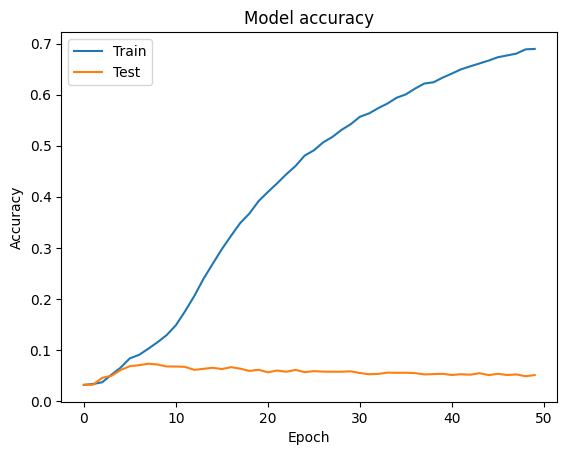

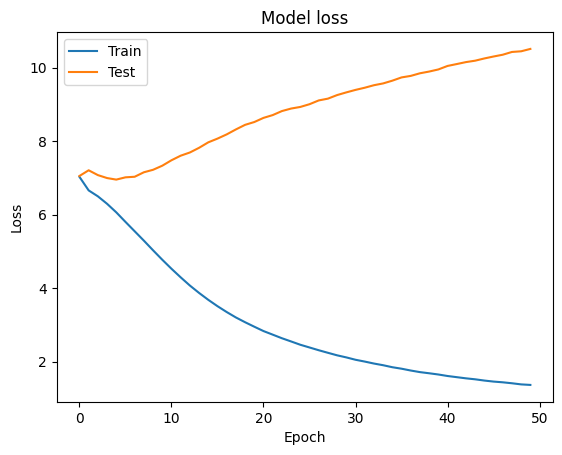

In [17]:


import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Prediction uisng the model**

In [18]:
# Function to predict the next word
def predict_next_word(model, tokenizer, text, max_sequence_len):
    token_list = tokenizer.texts_to_sequences([text])[0]
    if len(token_list) >= max_sequence_len:
        token_list = token_list[-(max_sequence_len-1):]  # Ensure the sequence length matches max_sequence_len-1
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted, axis=1)
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            return word
    return None

In [19]:
input_text="I thinke I heare"
print(f"Input text:{input_text}")
max_sequence_len=model.input_shape[1]+1
next_word=predict_next_word(model,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:I thinke I heare
Next Word PRediction:him


In [20]:
input_text="And let vs once againe"
print(f"Input text:{input_text}")
max_sequence_len=model.input_shape[1]+1
next_word=predict_next_word(model,tokenizer,input_text,max_sequence_len)
print(f"Next Word PRediction:{next_word}")

Input text:And let vs once againe
Next Word PRediction:assaile


# **Save the model**


In [21]:
model.save("next_word_gru.h5")
## Save the tokenizer
import pickle
with open('tokenizer_gru.pickle','wb') as handle:
    pickle.dump(tokenizer,handle,protocol=pickle.HIGHEST_PROTOCOL)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
